## Normal Distribution

In [28]:
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np

In [4]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

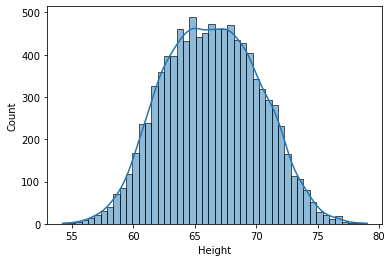

In [29]:
sns.histplot(df.Height, kde=True)

In [11]:
mean = df.Height.mean()
mean

66.36755975482124

In [12]:
std_dev = df.Height.std()
std_dev

3.847528120773229

In [13]:
#To remove outliers in the height column, we ca do some data cleaning
mean - 3 * std_dev

54.82497539250156

In [14]:
mean + 3 * std_dev

77.91014411714093

In [15]:
#Calculate outliers
outliers = df[(df.Height < mean - 3 * std_dev) | (df.Height > mean + 3 * std_dev)]
outliers

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [16]:
#To have a dataset without outliers
df_no_outliers = df[(df.Height >= mean - 3 * std_dev) & (df.Height <= mean + 3 * std_dev)]
df_no_outliers.shape

(9993, 3)

<AxesSubplot:xlabel='Height', ylabel='Count'>

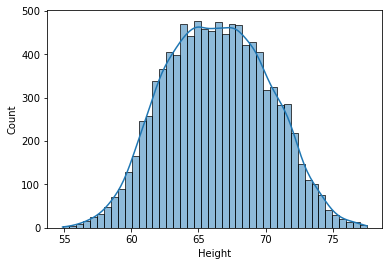

In [30]:
#Cleaned histogram with outliers removed
sns.histplot(df_no_outliers.Height, kde=True)

### Z-Score
depicts how many standard deviation away a datapoint is from the mean

Z-Score = datapoint(x) - mean(u) / std.dev

In [21]:
df['Z-Score'] = (df.Height - df.Height.mean()) / df.Height.std()
df.head()

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [23]:
df[(df["Z-Score"] < -3)|(df["Z-Score"] > 3)]

,Gender,Height,Weight,Z-Score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


### Central Limit Theorem(CLT)

In [26]:
x = np.random.normal(size = 10000)

c:\Users\shemn\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

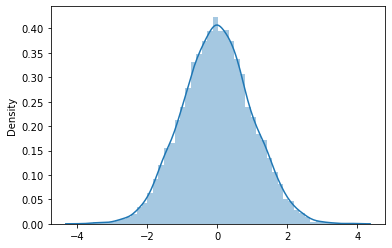

In [32]:
sns.distplot(x)

### Sampling from the normally-distributed population

In [35]:
x_sample = np.random.choice(x, size = 10, replace=False)
x_sample

array([-1.41328802,  1.65476739,  1.37679775, -1.31552591,  2.04493821,
        0.57818225,  0.00644046, -1.13178539, -0.18000173,  0.2698179 ])

In [36]:
stats.mean(x_sample)

0.18903429061181676

In [37]:
def sample_mean_calculator(population_array, sample_size, n_samples):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population_array, size=sample_size, replace=False)
        sample_mean = stats.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

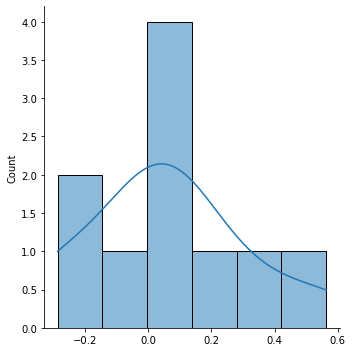

In [44]:
_ = sns.displot(sample_mean_calculator(x, 10, 10), kde = True)

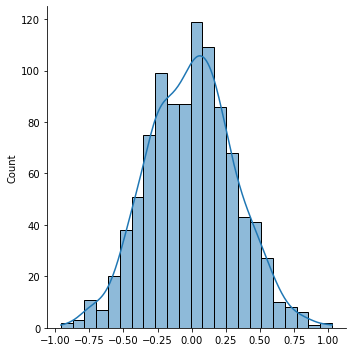

In [43]:
_ = sns.displot(sample_mean_calculator(x, 10, 1000), kde=True)

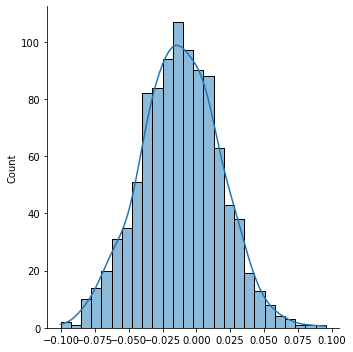

In [42]:
_ = sns.displot(sample_mean_calculator(x, 1000, 1000), kde = True)